# Regression

## What is regression? Which models can you use to solve a regression model?
<br>
Regression is part of supervised ML. Regression models investigate the relatrionship between a dependent (target) and independent variables. And the outcome, the target are continous numeric values. Follwing are some regression models:  

* Linear Regression: establishes a linear relationship between target and predictors. It predict a numeric values and has a **shape of straight line**. Ex:  y = w0 + w1 * x1 + w2 * x2 ......  
* Polynomial Regression: has a regression equation with the **power of independent variable more than 1**. It is a curve that fits into the data points.  Ex: y = w0 + w1 * x1 + w2 * x1^2 ....  
* [Ridge Regression](https://medium.com/chung-yi/ml%E5%85%A5%E9%96%80-%E4%BA%8C%E5%8D%81%E4%BA%8C-ridge-regression-f638e1887a7e): **helps when predictors are highly correlated (multicollinearity problem)**. It penalizes **the squares of regression coefficients** but doesn’t allow the coefficients to reach zeros **(uses L2 regularization)**.
* [Lasso Regression](https://dotblogs.com.tw/dash_analysis/2017/11/03/161734): **penalizes the absolute values of regression coefficients (Use L1 regularization)**.and allows some of the coefficients to reach absolute zero (thereby allowing feature selection).


## What is linear regression? When do we use it?
Linear regression is a model that assumes a linear relationship between the input variables (X) and the single output variable (y).  
The case of only one explanatory variable is called **simple linear regression**. For more than one variable is called **multiple linear regression**
<br>
Simple linear regression:

    y = B0 + B1 * x1  
Multiple linear regression:  

    y = B0 + B1 * x1 + ... + Bn * xN
<br>

## What are the main assumptions of linear regression?  
There are several assumptions of linear regression. **If any of them is violated, model predictions and interpretation may be worthless or misleading.**
1. **Linear Relationship** exists between features and target variables  
2. **Additivity (little or no Autocorrelation)**: means the effect of changes of one feature on the target variable **does not depend** on the values of other features.    

    For example, a model for predicting revenue of a company have of two features - the number of items a sold and the number of items b sold. When company sells more items a the revenue increases and this is independent of the number of items b sold. But, if customers who buy a stop buying b, the additivity assumption is violated.
3. **Features are not correlated (little or no multicollinearity)**: It would be difficult to seperate out the individual effects of collinear features on the target value
4. **Errors are independently and identically normally distributed (i.i.d)**:  
    1. No correlation between errors
    2. Constant variance of errors - homoscedasticity
    3. Errors are normaly distributed, otherwise some features will have more influence on the target variable than to others. If the error distribution is significantly non-normal, confidence intervals may be too wide or too narrow.

[Homoscedasticity Explanation](https://www.statology.org/linear-regression-assumptions/)


## What's normal distribution? Why do we care about it?
The normal distribution is a continuous probability distribution whose probability density function takes the following formula:  
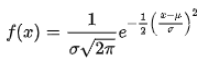
where **μ is the mean and σ is the standard deviation** of the distribution.  
<br>
The normal distribution derives its importance from the **Centra Limit Theorem**:  

Which states that if we draw a **large enough number(N>30) of samples**, their **mean will follow a normal distribution regardless of the initial distribution of the sample**. For example, the distribution of mean of samples is normal.It is important that each sample is independent from the other.

This is powerful because it helps us study processes whose population distribution is unknown to us.
<br>

## How to check if a random variable follows the normal distribution?
1. Plot the histogram out of sampled data. Check whether it fit the bell-shaped "normal" curve to the histogram.
2. Check **Skewness and Kurtosis**. Skewness = 0 and Kurtosis = 3 are typical for a normal distribution, so the farther away they are from these values, the more non-normal the distribution 
3. Use **Kolmogorov-Smirnov** or/and **Shapiro-Wilk** tests for normality. They take into account both Skewness and Kurtosis simultaneously.
4. Check for Quantile-Quantile plot. It is a scatterplot created by plotting two sets of quantiles against one another. Normal Q-Q plot place the data points in a roughly straight line.
----
[Skewness & Kurtosis](http://www.pinzhi.org/forum.php?mod=viewthread&tid=4095) [Useful link](https://www.cnblogs.com/wyy1480/p/10474046.html)  
Kurtosis coeff: The extent of steepness. 0 means as steep as Normal distributiom, >0 means is extra steeper(leptokurtic, can determine an higher probability of outliers values. ), vice versa for <0.  
<br>
Skewness coeff: To measure the data set is skew to right or left. 0 means not skew just as Normal distrubition, >0 skew to right(longtail on the right, more outlier on the right ) ,vice versa for <0

[Quantile-Quantile Plot (q-q-plot)](https://www.surfacewalker.com/post/2017/03/22/r-language-%E5%B8%B8%E6%85%8Bq-q%E5%9C%96normal-q-q-plot%E7%B0%A1%E4%BB%8B%E8%88%87%E7%B9%AA%E8%A3%BD)
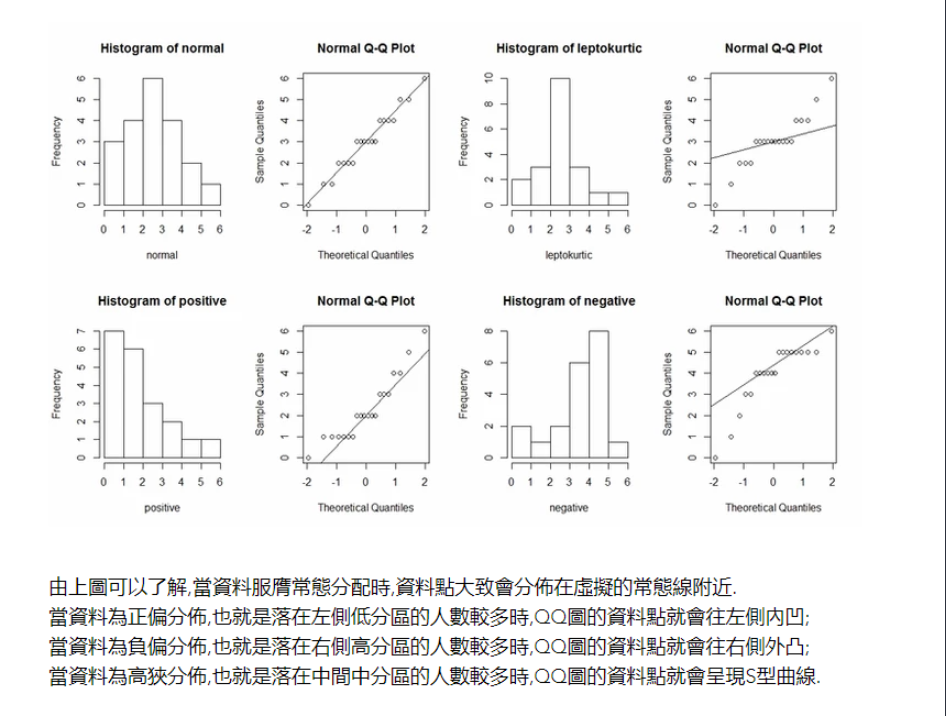

----

## What if we want to build a model for predicting prices? Are prices distributed normally? Do we need to do any pre-processing for prices? ‍
Data is not normal. Specially, real-world datasets or uncleaned datasets always have certain skewness.So, there's a great chance of presence of some skewed values i.e outliers if we talk in data science terms.  
Yes, you may need to do pre-processing. Most probably, you will need to **remove the outliers to make your distribution near-to-normal**.


## What methods for solving linear regression do you know? ‍
To solve linear regression, you need to find the coefficient $\beta$  which minimize the sum of squared errors(SSE).

[Matrix Algebra method](https://www.sydney.edu.au/content/dam/students/documents/mathematics-learning-centre/using-matrix-algebra-in-linear-regression.pdf):  Let's say you have X, a matrix of features, and y, a vector with the values you want to predict. After going through the matrix algebra and minimization problem, you get this solution(normal equation):
$$
\beta = (X^{T} X)^{-1} X^{T}y
$$
But solving this requires to find the inverse $(X^{T} X)^{-1}$, which can be time-consuming, if not impossible. Luckily, there aremethods like SVD or QR decomposition can calculate this part $(X^{T}X)^{-1}X^{T}$ (called the pseudo-inverse) without actually need to find the inverse.The popular python ML library sklearn uses SVD to solve least squares.  
Alternative method: Gradient Descent. See explanation below.

----
Suppporting materials: [SVD for linear regression](https://sthalles.github.io/svd-for-regression/)
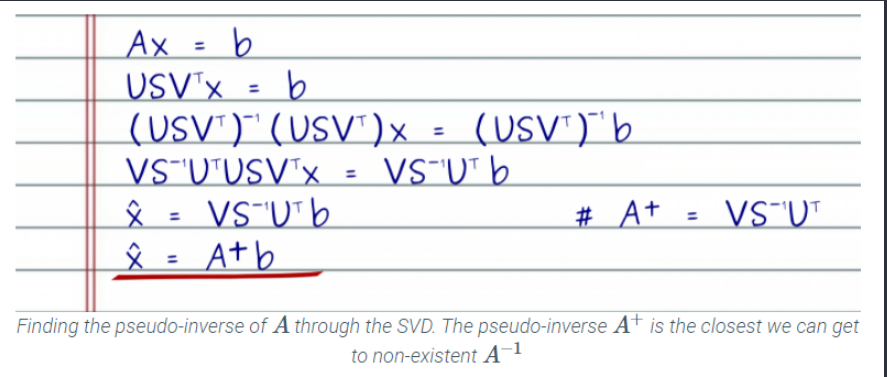

---

## What is the normal equation?

Normal equations are equations obtained by setting equal to zero the partial derivatives of the sum of squared errors (least squares); normal equations allow one to estimate the parameters of a multiple linear regression.
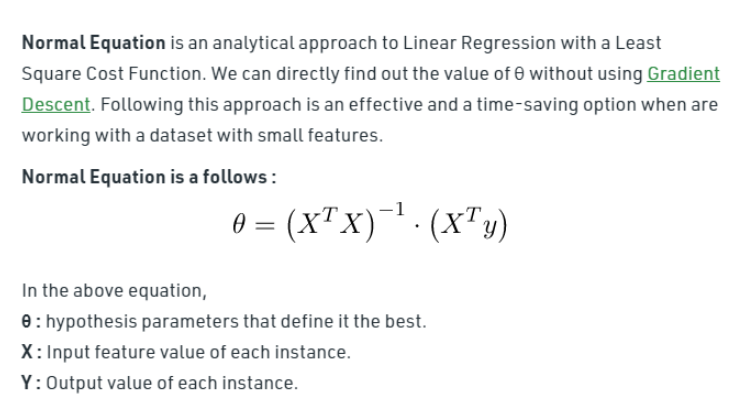
## [What is gradient descent](https://www.youtube.com/watch?v=sDv4f4s2SB8&ab_channel=StatQuestwithJoshStarmer)? How does it work?

Gradient descent is an algorithm that uses calculus concept of gradient to try and reach local or global minima. It works by taking the negative of the gradient in a point of a given function, and updating that point repeatedly using the calculated negative gradient, until the algorithm reaches a local or global minimum, which will cause future iterations of the algorithm to return values that are equal or too close to the current point. It is widely used in machine learning applications. 
Common loss function is SSE(sum of squared residual), Learning rate = 0.01  
Step size = slope * learning rate


## [What is SGD  —  stochastic gradient descent](https://www.youtube.com/watch?v=vMh0zPT0tLI&ab_channel=StatQuestwithJoshStarmer)? What’s the difference with the usual gradient descent?

In both gradient descent (GD) and stochastic gradient descent (SGD), you update a set of parameters in an iterative manner to minimize an error function(loss function). **SGD is especially useful when there are redundancy in the data.**

While in GD, you have to run through ALL the samples in your training set to do a single update for a parameter in a particular iteration, in SGD, on the other hand, you use **ONLY ONE or SUBSET** of training sample from your training set to do the update for a parameter in a particular iteration. If you use SUBSET, it is called **Minibatch Stochastic gradient Descent.**

## Which metrics for evaluating regression models do you know? 

1. Mean Squared Error(MSE)
2. Root Mean Squared Error(RMSE)
3. Mean Absolute Error(MAE)
4. R² or Coefficient of Determination
5. Adjusted R²

## What is the bias-variance trade-off? 

**Bias** is the error introduced by approximating the true underlying function, which can be quite complex, by a simpler model. Variance is a model sensitivity to changes in the training dataset.

**Bias-variance trade-off is** a relationship between the **expected test error and the variance and the bias** - both contribute to the level of the test error and ideally should be as small as possible:

    ExpectedTestError = Variance + Bias² + IrreducibleError
But as a model complexity increases, the bias decreases and the variance increases which leads to overfitting. And vice versa, model simplification helps to decrease the variance but it increases the bias which leads to underfitting.